In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bower\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Collecting and cleaning the data

In [2]:
df_one = pd.read_csv("datasets/phishing_data_by_type.csv")
df_one = df_one.loc[df_one["Type"] != "False Positives "]

dataset = np.array(df_one["Subject"] + " " + df_one["Text"])
print(len(dataset))

df_two = pd.read_csv("datasets/Phishing_Email.csv")
df_two = df_two.loc[df_two["Email Type"] == "Phishing Email"]

dataset = np.concatenate((dataset, (np.array(df_two["Email Text"]))), axis=0)

print(len(dataset))

120
7448


In [3]:
def clean_text(text):
    text = str(text)
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

data = [clean_text(text) for text in dataset]

## Keyword search to assign attacks to sectors

In [4]:
def keyword_search(sector, keywords, data):
    count = 0
    emails, labels = [], []
    
    # Create a regular expression pattern for matching the keywords
    pattern = "|".join(map(re.escape, keywords))
    pattern = r"\b({})\b".format(pattern)
    
    # Iterate through the email array and search for keywords
    for index, email in enumerate(data, start=1):
        matches = re.findall(pattern, email) 

        if matches:
            # print(f"Email {index} contains the following keywords: {', '.join(matches)}")
            emails.append(email)
            labels.append(sector)
            count += 1
            
    return count, emails, labels

In [5]:
emails = []
labels = []

# Financial Services Sector
finance_keywords = ["banking", "credit card", "wire transfer", "investment", "financial", "atm"]
finance_count, finance_emails, finance_labels = keyword_search("finance", finance_keywords, data)
emails += finance_emails
labels += finance_labels

print("FINANCE:", finance_count)

# Online Services Sector
online_keywords = [ "social media", "privacy policy", "subscription", "online shopping", "online gaming", "tech", "free trial", "product recall", "friend request", "profile update", "order confirmation", "discounts", "discount", "return policy", "exchange policy", "shopping cart", "software updates", "software update", "device", "game", "customer feedback", "gift card"]
# "shipping", "tracking",
online_count, online_emails, online_labels = keyword_search("online", online_keywords, data)
emails += online_emails
labels += online_labels

print("ONLINE:",  online_count)

# Government and Public Sector
gov_keywords = ["government", "job opportunities", "job opportunity", "legal", "nonprofit", "scholarships", "financial aid", "grants", "grant", "social security", "workplace", "campus", "tuition", "transcripts", "transcript", "academic", "student loans", "student loan", "fundraising", "volunteer", "donation", "court", "criminal", "crime", "law", "jury", "payroll", "employee", "vote", "public service", "passport renewal"]
gov_count, gov_emails, gov_labels = keyword_search("gov", gov_keywords, data)
emails += gov_emails
labels += gov_labels

print("GOV:", gov_count)

# Essential Services and Healthcare Sector
health_keywords = ["healthcare", "health", "pharmacy", "covid", "covid-19", "medicine", "medical", "medication", "medicare", "patient", "electricity", "utility", "travel", "airline"]
#"appointment", "appointments",
health_count, health_emails, health_labels = keyword_search("health", health_keywords, data)
emails += health_emails
labels += health_labels

print("HEALTH:", health_count)

FINANCE: 983
ONLINE: 599
GOV: 882
HEALTH: 825


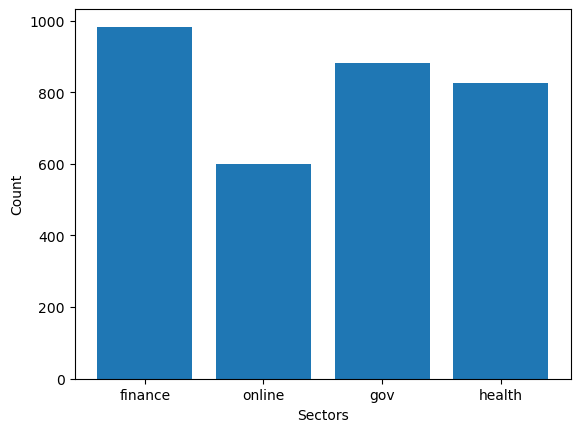

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(labels)
plt.bar(list(counts.keys()), list(counts.values()))

plt.xlabel('Sectors')
plt.ylabel('Count')

plt.show()